# Lecture 03 - Toy Problem, Linear Regression, Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

## 1. Toy Data Problem

### Data From Your 100 Friends

In [ ]:
socks=np.random.randint(1, 10, 100)
pants=np.random.randint(1, 10, 100)
other_impact=np.random.randn(100)
cost=23.0*pants+5.0*socks+2.0*other_impact
X=np.column_stack((socks, pants, other_impact, cost))

### Visualization Cost v.s. Pants

In [ ]:
plt.scatter(X[:,1], X[:,3])
plt.title('Scatter plot')
plt.xlabel('pants')
plt.ylabel('cost')
plt.show()

### Visualization Cost v.s. Socks

In [ ]:
plt.scatter(X[:,0], X[:,3])
plt.title('Scatter plot')
plt.xlabel('socks')
plt.ylabel('cost')
plt.show()

## 2. Single Variable Linear Regression
#### Model:  $y = \beta_0 +\beta_1 x$

#### Model estimation:
\begin{equation}
\beta_1=\frac{\frac{1}{n}\sum\limits_{i=1}^{n}y^{i}x^{i}-\bar{y}\bar{x}}{{\frac{1}{n}\sum\limits_{i=1}^{n}x^{i}x^{i}}-\bar{x}\bar{x}}=\frac{Cov(X,Y)}{Var(X)}=\rho_{XY}\frac{\sigma_X}{\sigma_Y}
\end{equation}
\begin{equation}
{\beta_0}=(\bar{y}-\beta_1\bar{x})
\end{equation}


In [ ]:
Ycost=X[:, 3]  #use the 4th column i.e. cost as the target variable 
Xpants=X[:, 1] #use 2nd column i.e. number of pants as predictor

In [ ]:
print(np.matmul(Xpants-np.mean(Xpants), Y.T-np.mean(Ycost))/100) #Biased estimation of Cov(X,Y)

In [ ]:
print(np.cov(Xpants, Ycost, bias=True)[0][1]/(np.std(Xpants)*np.std(Ycost))) # set bias to be true to be consistent with the sklearn calculation

#### Calculate the correlation coeffcient $\rho_{XY}$

In [ ]:
print (np.corrcoef(Xpants, Ycost)[0][1])

#### Calculate the linear model coefficients 

$\beta_1=\rho_{XY}\frac{\sigma_X}{\sigma_Y}$

$\beta_0=\bar{y}-\beta_1 \bar{x}$

In [ ]:
beta1=np.corrcoef(Xpants, Ycost)[0][1]*np.std(Ycost)/np.std(Xpants)

print("beta1", beta1)

In [ ]:
beta0=np.mean(Ycost)-beta1*np.mean(Xpants)
print('beta0', beta0)

#### Use sklearn package function 
```class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)```
##### Memebers: coef_ ... et.c
##### Methods: fit(self, X, y[, sample_weight]) ... etc.



#### More Details https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression() # Instantiate an object of class LinearRegression
reg.fit(Xpants.reshape((100,1)), Ycost.reshape((100,1)))
print ([reg.coef_, reg.intercept_])

## 3. Multivariate Linear Regression

#### Model:  $y = \beta_0 +\beta_1 x_1 + \beta_2 x_2 +\beta_3 x_3+....\beta_m x_m$
#### Model Estimation $\beta=({X^T}{X})^{-1}{X^{T}}{y}$

#### In our case $Cost=\beta_0 + \beta_1 socks+\beta_2 pants $


In [ ]:
Xpantsocks=X[:, [0, 1]]
Ycost_colmat=Ycost.reshape(100,1)

#### Fit a linear model with intercept

In [ ]:
multireg = LinearRegression()
multireg.fit(Xpantsocks, Ycost_colmat) #X[:,(0,1)] - use the first and second column as predictors
# note the Ycost.reshape is to make the matrix match the dimention of Xpantsocks 
print ([multireg.coef_, multireg.intercept_])

#### Fit a linear model without intercept

In [ ]:
multireg = LinearRegression(fit_intercept=False)
multireg.fit(Xpantsocks, Ycost_colmat) #X[:,(0,1)] - use the first and second column as predictors
# note the Ycost.reshape is to make the matrix match the dimention of Xpantsocks 
print ([multireg.coef_, multireg.intercept_])

#### Multivariate Linear Regression from Scratch: without intercept

In [ ]:
#Calculate bete follow the estimation equation
beta=np.matmul(np.matmul(np.linalg.inv(np.matmul(Xpantsocks.T, Xpantsocks)), Xpantsocks.T), Ycost_colmat)

In [ ]:
print(beta) # note we are missing the beta0 coefficient, we need to add 

#### Multivariate Linear Regression from Scratch: with intercept
#### Trick: add a column all of ones to the matrix Xpantsocks i.e. a matrix
\begin{equation}
X_{nxm,1}=\begin{bmatrix}x_{1,1} & x_{1,2} & \dots & x_{1,n} &1   \\ a_{2,1} & a_{2,2} & \dots & \dots &1  \\      x_{3,1} & x_{3,2} & \ddots & \dots  &1\\      x_{n,1}  & \vdots  & \vdots & x_{n,m}   &1  
\end{bmatrix}  
\end{equation}
The model results from this data set is 

$y=\beta_0 x_0+\beta_1 x_1+\beta_2 x_2+ ....\beta_3 x_3=\beta_0 +\beta_1 x_1+\beta_2 x_2+ ....\beta_3 x_3$
because $x_0=1$

In [ ]:
Xpantsocks_1=np.column_stack([Xpantsocks, np.ones([100, 1])]) #create the [X, 1] matrix

In [ ]:
beta=np.matmul(np.matmul(np.linalg.inv(np.matmul(Xpantsocks_1.T, Xpantsocks_1)), Xpantsocks_1.T), Ycost_colmat)
print(beta)

## 4. Logistic Regression
#### Likelihood 
\begin{equation}
\ell=\log(L)={\sum_{i=1}^{n}y^i\log(p_i)+(1-y^i)\log(1-p_i)}
\end{equation}

#### Parameter model
\begin{equation}
p_i=\frac{1}{1+\exp\left(-(\beta_0+\beta_1x_1^i+\beta_2 x_2^i+...\beta_m x_m^i)\right)}
\end{equation}

#### Newton-Raphson Method

\begin{equation}
\beta_{k+1}=\beta_k-\frac{\ell'(\beta_k)}{\ell''(\beta_k)}, \text { until } |\beta_{k+1}-\beta_{k}|<\delta
\end{equation}

### Synthesized Data  

In [3]:
X1 = 2*np.random.randn(5000, 1)
X2 = 5*np.random.randn(5000, 1)
X3 = np.random.randn(5000, 1)
eta=0.5*X1+0.1*X2+1.56*X3-1
X=np.column_stack([X1,X2, X3])
p=1/(1+np.exp(-eta))
y=np.random.binomial(1, p).reshape(5000,1)

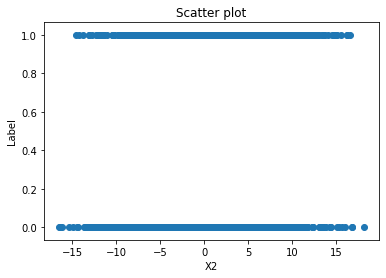

In [4]:
plt.scatter(X[:,1], y)
plt.title('Scatter plot')
plt.xlabel('X2')
plt.ylabel('Label')
plt.show()

### Use sklearn package function 
```class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)```

##### Memebers: coef_ ... et.c
##### Methods: fit(self, X, y[, sample_weight]) ... etc.

#### More Details https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [5]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='none', solver='newton-cg', fit_intercept=False)

In [7]:
lr.fit(X,y.reshape(y.size))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
print([lr.coef_, lr.intercept_])

[array([[0.41366975, 0.07046864, 1.31422994]]), array([0.])]


### Logistic Regression from Scratch

#### Hessian Matrix:
\begin{align*}
{{H}}={-X^TWX}, {W}=  
\begin{bmatrix}
   {p_1 (1-p_1)} & & \\
    & \ddots & \\
    & & {p_n (1-p_n)}
  \end{bmatrix}
\end{align*}

#### Iteratively Re-Weighted Least Squares
\begin{align*}
{\vec{\beta}^{(k+1)}} &\leftarrow {\vec{\beta}^{(k)}+({X}^T{W}{X})^{-1}{X}^T({y}-{p})}
\end{align*}

In [9]:
beta = np.array([0.2, 0.1, 0.1]).reshape(-1, 1) # Initialize beta

In [10]:
print(beta)

[[0.2]
 [0.1]
 [0.1]]


#### Initialize the update value (set to be 1) for every iteration i.e.
$\Delta\beta=({X}^T{W}{X})^{-1}{X}^T({y}-{p})$


In [11]:
Deltabeta= np.array([0.1, 0.1, 0.1]).reshape(-1, 1)

In [12]:
while np.max(np.abs(Deltabeta))>1e-15:
    p=1/(1+np.exp(-np.matmul(X, beta)))
    W=np.diag(np.multiply(p,(1-p))[:,0])
    XtY=np.matmul(X.T, (y-p))
    XtWX=np.matmul(np.matmul(X.T, W), X)
    Deltabeta=np.matmul(np.linalg.inv(XtWX), XtY)
    beta=np.add(beta, Deltabeta)
print(beta.T)

[[0.41366975 0.07046864 1.31422994]]


#### Model Prediction

##### Prediction use home-made logistic regression model

In [13]:
1/(1+np.exp(-np.dot(beta.T, X[0])))

array([0.44314002])

##### Prediction use sklearn built-in logistic regression model

In [14]:
lr.predict_proba(X[0:1])

array([[0.55685998, 0.44314002]])

In [15]:
lr.predict_proba(X[0:10]) 

array([[0.55685998, 0.44314002],
       [0.31766022, 0.68233978],
       [0.84533305, 0.15466695],
       [0.92242411, 0.07757589],
       [0.44508755, 0.55491245],
       [0.10161411, 0.89838589],
       [0.74820946, 0.25179054],
       [0.81449061, 0.18550939],
       [0.844451  , 0.155549  ],
       [0.20970116, 0.79029884]])

In [16]:
lr.predict(X[0:10]) 

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1])